In [12]:
fertilizer_json = {'Kalkammonsalpeter': {'Zusammensetzung': 0.27, 'Emissionsfaktor': 7.101}, 
                   '791Kalkammonsalpeter': {'Zusammensetzung': 0.27, 'Emissionsfaktor': 7.101},
                   'xfm_KAS (Kalkammonsalpeter)':  {'Zusammensetzung': 0.27, 'Emissionsfaktor': 7.101},
                   '794-Kalkammonsalpete': {'Zusammensetzung': 0.27, 'Emissionsfaktor': 7.101},
                   'Harnstoff': {'Zusammensetzung': 0.46, 'Emissionsfaktor': 12.4}, 
                   'ASS': {'Zusammensetzung': 0.26, 'Emissionsfaktor': 11.438},
                   'ASS 26N': {'Zusammensetzung': 0.26, 'Emissionsfaktor': 11.438},
                   'Kalkamonsalpeter 27': {'Zusammensetzung': 0.27, 'Emissionsfaktor': 7.101},
                   '791-Ammonsulfatsalpe': {'Zusammensetzung': 0.26, 'Emissionsfaktor': 11.438}, 
                   'DAP': {'Zusammensetzung': {'N': 0.18, 'P2O5': 0.46}, 'Emissionsfaktor': 11.958}, 
                   'Diammonphosphat': {'Zusammensetzung': {'N': 0.18, 'P2O5': 0.46}, 'Emissionsfaktor': 11.958},
                   'Gülle (Organisch)': {'Zusammensetzung': 1.0, 'Emissionsfaktor': 4.97}, 
                   'Menge': {'Zusammensetzung': 1.0, 'Emissionsfaktor': 4.97}, 
                   'Curbatur + Caramba + Karate': {'Zusammensetzung': 0.007875, 'Emissionsfaktor': 8.674}, 
                   'Mertil + Herbosol': {'Zusammensetzung': 0.005, 'Emissionsfaktor': 8.735}, 
                   'Broadway Plus': {'Zusammensetzung': 0.0048, 'Emissionsfaktor': 8.735}, 
                   'Elatus Era + Countdown+U46M': {'Zusammensetzung': 0.0153, 'Emissionsfaktor': 8.298}, 
                   'Tank mix 2024-04-07 17-07-24': {'Zusammensetzung': 0.009369747916690442, 'Emissionsfaktor': 0}, 
                   'Revytrex': {'Zusammensetzung': 0.03833333333333333, 'Emissionsfaktor': 8.298}, 
                   'T3': {'Zusammensetzung': 0.057233502780120384, 'Emissionsfaktor': 8.298}, 
                   'Sparviero': {'Zusammensetzung': 0.00028846153846153843, 'Emissionsfaktor': 10.976}, 
                   'Erbsen': {'Zusammensetzung': 0.001, 'Emissionsfaktor': 8.674}, 
                   'Kyleo': {'Zusammensetzung': 0.02145922746781116, 'Emissionsfaktor': 8.735}, 
                   'Mateno Boxer': {'Zusammensetzung': 0.012799999952316284, 'Emissionsfaktor': 8.735}, 
                   'Ascra XPRO': {'Zusammensetzung': 0.006000000238418579, 'Emissionsfaktor': 8.298}, 
                   'Skyway': {'Zusammensetzung': 0.006000000238418579, 'Emissionsfaktor': 8.298}, 
                   'Butisan Gold': {'Zusammensetzung': 0.013157894736842105, 'Emissionsfaktor': 8.735}, 
                   'Insektizid': {'Zusammensetzung': 0.015375000014901162, 'Emissionsfaktor': 10.976}, 
                   'METAREX': {'Zusammensetzung': 0.015375000014901162, 'Emissionsfaktor': 10.976}, 
                   'KerbFlo': {'Zusammensetzung': 0.008999999761581421, 'Emissionsfaktor': 8.735}, 
                   'Mavrik Vita': {'Zusammensetzung': 0.006, 'Emissionsfaktor': 10.976}, 
                   'Cantus': {'Zusammensetzung': 0.005, 'Emissionsfaktor': 8.298}, 
                   'Mateno0,7cadou0,5boxer3': {'Zusammensetzung': 0.016799999952316284, 'Emissionsfaktor': 8.735}, 
                   'Mate035cadou0,5': {'Zusammensetzung': 0.003399999976158142, 'Emissionsfaktor': 8.674},
                   'yield': {'Zusammensetzung': 86, 'Emissionsfaktor': 34.6}, 
                   'FUEL': {'Zusammensetzung': 1.0, 'Emissionsfaktor': 3.122}, }
gemmingen_area = 10.11 #per Ha

In [ ]:
#%pip install geopandas
#%pip install shapely
#%pip install reportlab
# %pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.8 MB 4.9 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/7.8 MB 5.7 MB/s eta 0:00:01
   ---------------- ----------------------- 3.1/7.8 MB 5.5 MB/s eta 0:00:01
   --------------------- ------------------ 4.2/7.8 MB 5.4 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/7.8 MB 5.0 MB/s eta 0:00:01
   -------------------------------- ------- 6.3/7.8 MB 5.0 MB/s eta 0:00:01
   ------------------------------------ --- 7.1/7.8 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 4.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------- ------------------------- 0.8/2.2 MB 4.7 MB/s eta 0:00:01
   -------------------------------------- - 2.1/2.2 MB 5.2 MB/s eta 0:00:01
   --------------------------

In [13]:
#util files
def convert_units(value, from_unit, to_unit):
    """
    Converts the value between supported units.
    For simplicity, this function supports conversion between:
    - 'ml1ha-1' and 'l1ha-1'
    """
    conversion_factors = {
        ("ml1ha-1", "l1ha-1"): 0.001,  # 1 ml = 0.001 l
        ("l1ha-1", "ml1ha-1"): 1000,   # 1 l = 1000 ml
        ("g1ha-1", "kg1ha-1"): 0.001,
        ("kg1ha-1", "g1ha-1"): 1000,
        ("g1ha-1", "l1ha-1"): 0.001,
        ("ml1ha-1", "kg1ha-1"): 0.001
    }
    
    if from_unit == to_unit:
        return value  # No conversion needed
    key = (from_unit, to_unit)
    if key in conversion_factors:
        return value * conversion_factors[key]
    raise ValueError(f"Unsupported unit conversion from {from_unit} to {to_unit}")

def process_product_data(product_data):
    if not product_data["TankMix"]:
        return "TankMix is False; no processing required."
    
    # Step 2: Get the rate value and unit
    rate_value = product_data["Rate"]["Value"]
    rate_unit = product_data["Rate"]["Unit"]
    
    # Step 3: Go into the components and find carriers == False
    components = product_data["Components"]
    carrier_sum = 0
    for component in components:
        if not component["Carrier"]:  # Check if carrier is False
            component_rate = component["Rate"]["Value"]
            component_unit = component["Rate"]["Unit"]
            
            # Step 4: Convert unit if different
            component_rate_converted = convert_units(component_rate, component_unit, rate_unit)
            carrier_sum += component_rate_converted
    
    # Step 5: Divide the summation by rate value
    result = carrier_sum / rate_value
    return result

In [14]:
# Cell 1: Import Libraries
import geopandas as gpd
import pandas as pd
import glob
import os
import json
from shapely.geometry import MultiPoint

# Set SHAPE_RESTORE_SHX environment variable
os.environ["SHAPE_RESTORE_SHX"] = "YES"

# Cell 2: Define Root Folder and Initialize List
root_folder = "D:\TUK\work\dfki\hackathon\Farm1_Jennewein\data"

# Initialize an empty list to store shapefile paths
shapefile_list = []
jsonfiles_list = []
# Traverse the directory structure
for subdir, _, _ in os.walk(root_folder):
    # Look for .shp files in the 'doc' folder of each subdirectory
    jsonfiles = glob.glob(os.path.join(subdir, "doc", "*.json"))
    shapefiles = glob.glob(os.path.join(subdir, "doc", "*.shp"))
    shapefile_list.extend(shapefiles)
    jsonfiles_list.extend(jsonfiles)

# Cell 3: Read Shapefiles and Combine into a Single GeoDataFrame
gdfs = []
for i, shapefile_path in enumerate(shapefile_list):
    gdf = gpd.read_file(shapefile_path)
    # Append the GeoDataFrame to a list
    gdfs.append(gdf)
    # with open(jsonfiles_list[i], "r") as file:
    #     jsonfile = json.load(file)
    #     if jsonfile['Product']['TankMix'] == True:
    #         Zusammensetzung = process_product_data(jsonfile['Product'])
    #         # print(Zusammensetzung)
    #         if str(gdf['Product'][0]) not in fertilizer_json:
    #             name = str(gdf['Product'][0])
    #             fertilizer_json[name] = {}
    #             fertilizer_json[name]["Zusammensetzung"] = Zusammensetzung
    #             fertilizer_json[name]["Emissionsfaktor"] = 0 
            # fertilizer_json[str(gdf['Product'][0])] =  {"Zusammensetzung" : Zusammensetzung}
            # fertilizer_json[str(gdf['Product'][0])]['Emissionsfaktor'] = 8.674

# Concatenate all GeoDataFrames into a single GeoDataFrame
print(fertilizer_json)
combined_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True), crs=gdfs[0].crs)

# Fill missing values with NA
combined_gdf = combined_gdf.fillna(0)

# Cell 4: Display Output and Columns
print("All shapefiles combined successfully!")
# Uncomment the lines below if you want to save the combined shapefile
# Cell 5: Save Combined GeoDataFrame as a Shapefile
# output_shapefile_path = os.path.join(root_folder, "combined_shapefile.shp")
# combined_gdf.to_file(output_shapefile_path)


<>:13: SyntaxWarning: invalid escape sequence '\T'
<>:13: SyntaxWarning: invalid escape sequence '\T'
C:\Users\shali\AppData\Local\Temp\ipykernel_16896\3479480201.py:13: SyntaxWarning: invalid escape sequence '\T'
  root_folder = "D:\TUK\work\dfki\hackathon\Farm1_Jennewein\data"


{'Kalkammonsalpeter': {'Zusammensetzung': 0.27, 'Emissionsfaktor': 7.101}, '791Kalkammonsalpeter': {'Zusammensetzung': 0.27, 'Emissionsfaktor': 7.101}, 'xfm_KAS (Kalkammonsalpeter)': {'Zusammensetzung': 0.27, 'Emissionsfaktor': 7.101}, '794-Kalkammonsalpete': {'Zusammensetzung': 0.27, 'Emissionsfaktor': 7.101}, 'Harnstoff': {'Zusammensetzung': 0.46, 'Emissionsfaktor': 12.4}, 'ASS': {'Zusammensetzung': 0.26, 'Emissionsfaktor': 11.438}, 'ASS 26N': {'Zusammensetzung': 0.26, 'Emissionsfaktor': 11.438}, 'Kalkamonsalpeter 27': {'Zusammensetzung': 0.27, 'Emissionsfaktor': 7.101}, '791-Ammonsulfatsalpe': {'Zusammensetzung': 0.26, 'Emissionsfaktor': 11.438}, 'DAP': {'Zusammensetzung': {'N': 0.18, 'P2O5': 0.46}, 'Emissionsfaktor': 11.958}, 'Diammonphosphat': {'Zusammensetzung': {'N': 0.18, 'P2O5': 0.46}, 'Emissionsfaktor': 11.958}, 'Gülle (Organisch)': {'Zusammensetzung': 1.0, 'Emissionsfaktor': 4.97}, 'Menge': {'Zusammensetzung': 1.0, 'Emissionsfaktor': 4.97}, 'Curbatur + Caramba + Karate': {'Z

In [37]:
combined_gdf['FUEL'][:5]

0    0.000221
1    0.000221
2    0.000221
3    0.000221
4    0.000221
Name: FUEL, dtype: float64

In [15]:
# combined_gdf['Product'] = combined_gdf['Product'].apply(lambda x: x.split(" ")[0])

# Cell 6: Calculate Emissions for Each Product
def calculate_emissions(row):
    product = row["Product"]
    appliedRate = row["AppliedRate"]
    
    # # Check if a fertilizer_json key is contained in the product
    # for key in fertilizer_json:
    #     if key in product:
    #         product = key
    #         break
    
    if product in fertilizer_json:
        if fertilizer_json[product]["Zusammensetzung"]:
            if isinstance(fertilizer_json[product]["Zusammensetzung"], dict):
                composition = fertilizer_json[product]["Zusammensetzung"]["N"]
            else:
                composition = fertilizer_json[product]["Zusammensetzung"]
            emissions_factor = fertilizer_json[product]["Emissionsfaktor"]
            emissions = composition * appliedRate * emissions_factor
        else:
            emissions = appliedRate * fertilizer_json[product]["Emissionsfaktor"]
    else:
        emissions = 0
    
    return emissions

combined_gdf["Emissions"] = combined_gdf.apply(calculate_emissions, axis=1)
combined_gdf["FuelEmissions"] = combined_gdf["FUEL"] * fertilizer_json["FUEL"]["Emissionsfaktor"]
combined_gdf["YieldEmissions"] = combined_gdf["VRYIELDMAS"] *  combined_gdf["DRYMATTER"] * fertilizer_json["yield"]["Zusammensetzung"] * fertilizer_json["yield"]["Emissionsfaktor"]
combined_gdf

,Time,Heading,DISTANCE,SWATHWIDTH,Product,SECTIONID,AppliedRate,ControlRate,TargetRate,Elevation,...,WetMass,Moisture,VARIETY,StrchPrcnt,CrdPrPrcnt,DRYMATTER,OIL,Emissions,FuelEmissions,YieldEmissions
0,3/6/2024 3:56:02 PM,336.800561,1.952782,2.000,791Kalkammonsalpeter,2304,300.0,0.0,300.0,288.697902,...,0.0,0.000000,0,0.0,0.0,0.000000,0.0,575.181,0.000690,0.0
1,3/6/2024 3:56:02 PM,336.800561,1.952782,2.000,791Kalkammonsalpeter,2305,300.0,0.0,300.0,288.697902,...,0.0,0.000000,0,0.0,0.0,0.000000,0.0,575.181,0.000690,0.0
2,3/6/2024 3:56:02 PM,336.800561,1.952782,2.000,791Kalkammonsalpeter,2306,300.0,0.0,300.0,288.697902,...,0.0,0.000000,0,0.0,0.0,0.000000,0.0,575.181,0.000690,0.0
3,3/6/2024 3:56:02 PM,336.800561,1.952782,2.000,791Kalkammonsalpeter,2307,300.0,0.0,300.0,288.697902,...,0.0,0.000000,0,0.0,0.0,0.000000,0.0,575.181,0.000690,0.0
4,3/6/2024 3:56:02 PM,336.800561,1.952782,2.000,791Kalkammonsalpeter,2308,300.0,0.0,300.0,288.697902,...,0.0,0.000000,0,0.0,0.0,0.000000,0.0,575.181,0.000690,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431695,8/15/2021 2:59:28 PM,241.255859,2.983159,2.325,0,3984,0.0,0.0,0.0,298.754499,...,0.0,15.785333,---,0.0,0.0,84.214667,0.0,0.000,0.033018,0.0
431696,8/15/2021 2:59:27 PM,236.394874,3.025159,1.705,0,3984,0.0,0.0,0.0,298.626499,...,0.0,15.785333,---,0.0,0.0,84.214667,0.0,0.000,0.031949,0.0
431697,8/15/2021 2:59:25 PM,236.496005,3.052159,1.395,0,3984,0.0,0.0,0.0,298.348499,...,0.0,15.785333,---,0.0,0.0,84.214667,0.0,0.000,0.031269,0.0
431698,8/15/2021 2:59:26 PM,236.269545,3.052159,1.395,0,3984,0.0,0.0,0.0,298.500499,...,0.0,15.785333,---,0.0,0.0,84.214667,0.0,0.000,0.030643,0.0


In [49]:
combined_gdf['Product'].unique()

array(['791Kalkammonsalpeter', 'DAP', 'xfm_KAS (Kalkammonsalpeter)',
       'Tank mix 2024-04-07 17-07-24', 'Revytrex', 'T3', 0, 'Sparviero',
       'Erbsen', 'Kyleo', 'Mateno Boxer', '791-Ammonsulfatsalpe', '---',
       '794-Kalkammonsalpete', 'Ascra XPRO', 'Skyway', 'METAREX',
       'Butisan Gold', 'Insektizid', 'KerbFlo', 'Mavrik Vita', 'Cantus',
       'Mateno0,7cadou0,5boxer3', 'Mate035cadou0,5'], dtype=object)

In [53]:
average_emissions = combined_gdf['Emissions'].mean() * gemmingen_area + combined_gdf['FuelEmissions'].mean() * gemmingen_area + combined_gdf['YieldEmissions'].mean() * gemmingen_area
print(average_emissions)

1139115.8736695342


In [54]:
combined_gdf_grouped = combined_gdf.groupby("Product").agg({"Emissions": "sum"}) * gemmingen_area
print(combined_gdf_grouped)

                                 Emissions
Product                                   
0                             0.000000e+00
---                           0.000000e+00
791-Ammonsulfatsalpe          6.262607e+08
791Kalkammonsalpeter          2.133026e+08
794-Kalkammonsalpete          1.034952e+08
Ascra XPRO                    1.443146e+06
Butisan Gold                  1.091508e+07
Cantus                        5.181684e+06
DAP                           6.517107e+07
Erbsen                        1.041798e+06
Insektizid                    3.207886e+07
KerbFlo                       3.682857e+06
Kyleo                         1.368800e+07
METAREX                       0.000000e+00
Mate035cadou0,5               1.065989e+06
Mateno Boxer                  7.892459e+06
Mateno0,7cadou0,5boxer3       8.028452e+06
Mavrik Vita                   5.150142e+06
Revytrex                      3.068431e+07
Skyway                        1.965344e+06
Sparviero                     2.009154e+05
T3         

In [52]:
output_shapefile_path = os.path.join(root_folder, "combined_data.geojson")
combined_gdf.to_file(output_shapefile_path,driver="GeoJSON")

In [16]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
import pandas as pd

C:\Users\shali\AppData\Local\Temp\ipykernel_16896\1100661578.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_gdf['Time'] = pd.to_datetime(combined_gdf['Time'])


Annual Report generated and saved as annual_report_geodata.pdf


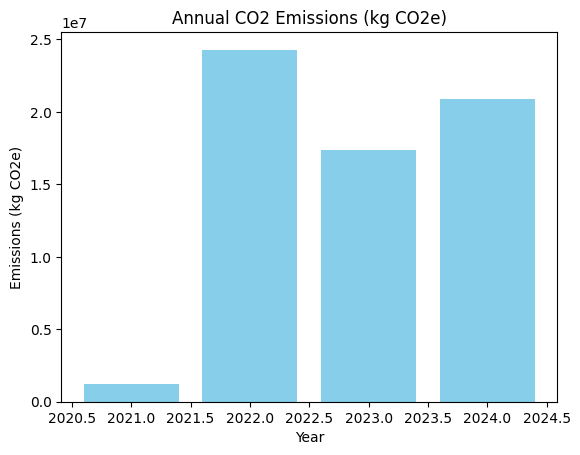

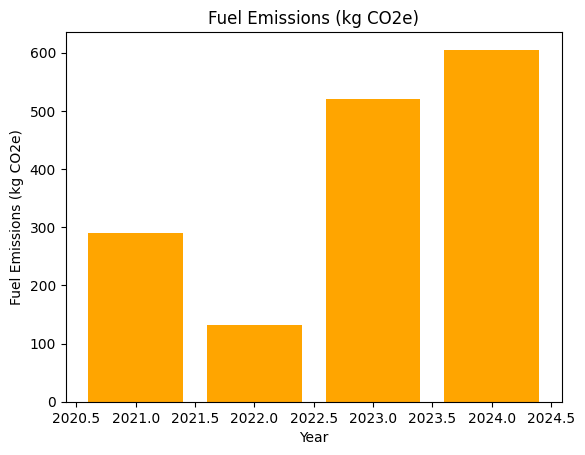

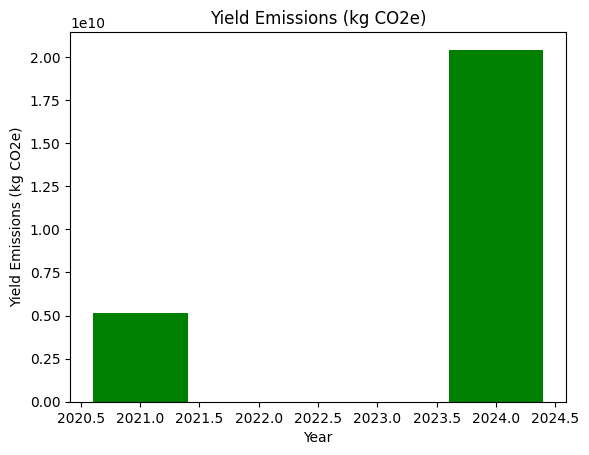

In [17]:
combined_gdf['Time'] = pd.to_datetime(combined_gdf['Time'])

# Add a `Year` column for grouping
combined_gdf['Year'] = combined_gdf['Time'].dt.year

# --- Step 1: Aggregate Data ---
aggregated_data = combined_gdf.groupby('Year').agg({
    'Emissions': 'sum',           # Total emissions per year
    'FuelEmissions': 'sum',       # Total fuel emissions per year
    'YieldEmissions': 'sum',      # Total yield emissions per year
    'WetMass': 'mean',            # Average wet mass
    'DRYMATTER': 'mean',          # Average dry matter
}).reset_index()

# --- Step 2: Create Charts ---
# Create a bar chart for CO2 emissions
fig1, ax1 = plt.subplots()
ax1.bar(aggregated_data['Year'], aggregated_data['Emissions'], color='skyblue')
ax1.set_title('Annual CO2 Emissions (kg CO2e)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Emissions (kg CO2e)')

# Create a bar chart for fuel emissions
fig2, ax2 = plt.subplots()
ax2.bar(aggregated_data['Year'], aggregated_data['FuelEmissions'], color='orange')
ax2.set_title('Fuel Emissions (kg CO2e)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Fuel Emissions (kg CO2e)')

# Create a bar chart for yield emissions
fig3, ax3 = plt.subplots()
ax3.bar(aggregated_data['Year'], aggregated_data['YieldEmissions'], color='green')
ax3.set_title('Yield Emissions (kg CO2e)')
ax3.set_xlabel('Year')
ax3.set_ylabel('Yield Emissions (kg CO2e)')

# --- Step 3: Create a PDF ---
pdf_filename = "annual_report_geodata.pdf"
pdf_pages = PdfPages(pdf_filename)

# Save the plots to PDF
pdf_pages.savefig(fig1)
pdf_pages.savefig(fig2)
pdf_pages.savefig(fig3)

# --- Step 4: Add Insights and Table to PDF ---
def create_pdf_report():
    c = canvas.Canvas(pdf_filename, pagesize=letter)
    c.setFont("Helvetica-Bold", 18)
    c.drawString(72, 750, "Annual Sustainability Report (Geospatial Data)")

    c.setFont("Helvetica", 12)
    c.drawString(72, 730, "Farm Performance and CO2 Emissions Comparison")

    # Add Data Insights
    c.setFont("Helvetica", 10)
    c.drawString(72, 710, f"Data Source: Geospatial Farm Data")
    c.drawString(72, 690, f"- Total emissions decreased from {aggregated_data['Emissions'].iloc[0]:.2f} kg CO2e in {aggregated_data['Year'].iloc[0]} to {aggregated_data['Emissions'].iloc[-1]:.2f} kg CO2e in {aggregated_data['Year'].iloc[-1]}.")
    c.drawString(72, 670, f"- Fuel emissions show a {'decrease' if aggregated_data['FuelEmissions'].iloc[0] > aggregated_data['FuelEmissions'].iloc[-1] else 'slight increase'}.")
    c.drawString(72, 650, f"- Average yield-related emissions improved over the years.")

    # Add Table Data
    c.drawString(72, 630, "Yearly Data Comparison:")
    table_data = [["Year", "Emissions (kg CO2e)", "Fuel Emissions", "Yield Emissions", "Wet Mass", "Dry Matter"]]
    for _, row in aggregated_data.iterrows():
        table_data.append([row['Year'], row['Emissions'], row['FuelEmissions'], row['YieldEmissions'], row['WetMass'], row['DRYMATTER']])

    # Add Table to PDF
    y_position = 600
    for row in table_data:
        for col_num, cell in enumerate(row):
            c.drawString(72 + col_num * 100, y_position, str(cell))
        y_position -= 20

    c.showPage()
    c.save()

# Generate the PDF Report
create_pdf_report()

# Close the PDF pages for charts
pdf_pages.close()

print(f"Annual Report generated and saved as {pdf_filename}")

In [18]:
%pip install email

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
     -------------------------- ------------- 0.8/1.2 MB 4.3 MB/s eta 0:00:01
     ---------------------------------------- 1.2/1.2 MB 4.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [26 lines of output]
      Traceback (most recent call last):
        File "c:\Users\shali\anaconda3\envs\hackathon\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
          ~~~~^^
        File "c:\Users\shali\anaconda3\envs\hackathon\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ~~~~^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\shali\anaconda3\envs\hackathon\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
          return hook(config_settings)
        File "C:\Users\shali\AppData\Local\Temp\pip-build-env-9ami61k5\overlay\Lib\site-packages\setuptools\build_meta.py", line 334, in g

In [19]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email import encoders

def send_email(pdf_filename, recipient_email, sender_email, sender_password):
    """
    Send the generated PDF report via email.

    :param pdf_filename: The path to the PDF file to be sent.
    :param recipient_email: The recipient's email address.
    :param sender_email: The sender's email address.
    :param sender_password: The sender's email password.
    """
    # Email subject and body
    subject = "Annual Sustainability Report"
    body = "Please find attached the annual sustainability report."

    # Create email
    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = recipient_email
    msg['Subject'] = subject

    # Attach the email body
    msg.attach(MIMEText(body, 'plain'))

    # Attach the PDF file
    with open(pdf_filename, 'rb') as attachment:
        part = MIMEBase('application', 'octet-stream')
        part.set_payload(attachment.read())
        encoders.encode_base64(part)
        part.add_header(
            'Content-Disposition',
            f'attachment; filename={pdf_filename}',
        )
        msg.attach(part)

    # Connect to SMTP server and send email
    try:
        print("Connecting to SMTP server...")
        server = smtplib.SMTP('smtp.gmail.com', 587)  # Using Gmail as an example
        server.starttls()  # Secure the connection
        server.login(sender_email, sender_password)
        print("Sending email...")
        server.sendmail(sender_email, recipient_email, msg.as_string())
        print(f"Email successfully sent to {recipient_email}")
    except Exception as e:
        print(f"Failed to send email: {e}")
    finally:
        server.quit()

# --- Example Usage ---
pdf_filename = "annual_report_geodata.pdf"  # Replace with the path to your PDF file
recipient_email = "recipient@example.com"  # Replace with recipient's email
sender_email = "your_email@example.com"  # Replace with your email
sender_password = "your_email_password"  # Replace with your email password

# Call the function to send the email
send_email(pdf_filename, recipient_email, sender_email, sender_password)


Connecting to SMTP server...
Failed to send email: (535, b'5.7.8 Username and Password not accepted. For more information, go to\n5.7.8  https://support.google.com/mail/?p=BadCredentials 5b1f17b1804b1-434aa781200sm206024805e9.25 - gsmtp')
